In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

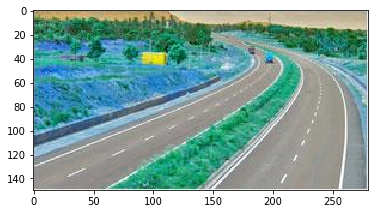

In [3]:
DATADIR = "E:/Study/Aegis/Deep Learning/pothole"
CATEGORIES = ["normal","potholes"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
print(img_array)

[[[255 246 231]
  [239 217 199]
  [255 239 215]
  ...
  [244 243 229]
  [221 220 210]
  [247 248 239]]

 [[237 220 201]
  [181 163 140]
  [184 162 134]
  ...
  [184 183 169]
  [179 178 168]
  [225 226 217]]

 [[252 242 212]
  [170 159 127]
  [162 146 109]
  ...
  [169 166 151]
  [173 171 160]
  [236 235 225]]

 ...

 [[231 226 223]
  [158 153 150]
  [148 145 141]
  ...
  [115 121 126]
  [139 145 150]
  [225 231 236]]

 [[220 215 212]
  [166 161 158]
  [164 161 157]
  ...
  [137 143 148]
  [147 153 158]
  [215 221 226]]

 [[255 255 252]
  [227 222 219]
  [237 234 230]
  ...
  [222 228 233]
  [207 213 218]
  [248 254 255]]]


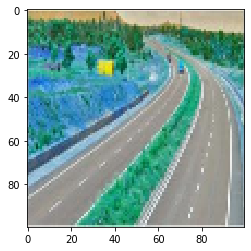

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
  print(len(training_data))

680


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
1
1
1
0


In [11]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)

In [12]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()